In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the datasets normally since headers exist
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [3]:
print("Deliveries columns:", deliveries.columns.tolist())

Deliveries columns: ['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket', 'player_dismissed', 'dismissal_kind', 'fielder']


In [4]:
print("Matches columns: ", matches.columns.tolist())

Matches columns:  ['id', 'season', 'city', 'date', 'match_type', 'player_of_match', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result', 'result_margin', 'target_runs', 'target_overs', 'super_over', 'method', 'umpire1', 'umpire2']


In [5]:
# Merging the two datasets on the match ID
df_unified = pd.merge(deliveries, matches, left_on='match_id', right_on='id')

print("Unified Dataset Columns:", df_unified.columns.tolist())
print()
df_unified.head()

Unified Dataset Columns: ['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket', 'player_dismissed', 'dismissal_kind', 'fielder', 'id', 'season', 'city', 'date', 'match_type', 'player_of_match', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result', 'result_margin', 'target_runs', 'target_overs', 'super_over', 'method', 'umpire1', 'umpire2']



,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,1.0,SC Ganguly,P Kumar,BB McCullum,0.0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,2.0,BB McCullum,P Kumar,SC Ganguly,0.0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,3.0,BB McCullum,P Kumar,SC Ganguly,0.0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,4.0,BB McCullum,P Kumar,SC Ganguly,0.0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,5.0,BB McCullum,P Kumar,SC Ganguly,0.0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen


In [6]:
# 1. Converting 'date' to datetime objects
df_unified['date'] = pd.to_datetime(df_unified['date'])

# 2. Handling missing values
df_unified['city'] = df_unified['city'].fillna('Unknown')

# 3. Handling 'extras_type'
df_unified['extras_type'] = df_unified['extras_type'].fillna('none')

# 4. Handling Wicket Information
df_unified['player_dismissed'] = df_unified['player_dismissed'].fillna('none')
df_unified['dismissal_kind'] = df_unified['dismissal_kind'].fillna('none')
df_unified['fielder'] = df_unified['fielder'].fillna('none')

# 5. Handling 'method' (Duckworth-Lewis etc.)
df_unified['method'] = df_unified['method'].fillna('standard')

# 6. Fill result_margin with 0 (for Ties/No Results where margin doesn't apply)
df_unified['result_margin'] = df_unified['result_margin'].fillna(0)

# Checking for nulls
print("Remaining nulls per column:")
print(df_unified.isnull().sum()[df_unified.isnull().sum() > 0])

print("\nData Cleaning Complete!")

Remaining nulls per column:
over            1
ball            1
batter          1
bowler          1
non_striker     1
batsman_runs    1
extra_runs      1
total_runs      1
is_wicket       1
dtype: int64

Data Cleaning Complete!


In [7]:
# Drop any row that still has critical delivery info missing
df_unified.dropna(subset=['total_runs', 'over', 'ball'], inplace=True)

# Final check
print("Final Null Count:", df_unified.isnull().sum().sum())

Final Null Count: 0


/tmp/ipython-input-3439180678.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=wickets_df, y='dismissal_kind', ax=axes[1], palette='viridis', order=wickets_df['dismissal_kind'].value_counts().index)
/tmp/ipython-input-3439180678.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=venue_avg.values, y=venue_avg.index, ax=axes[2], palette='magma')


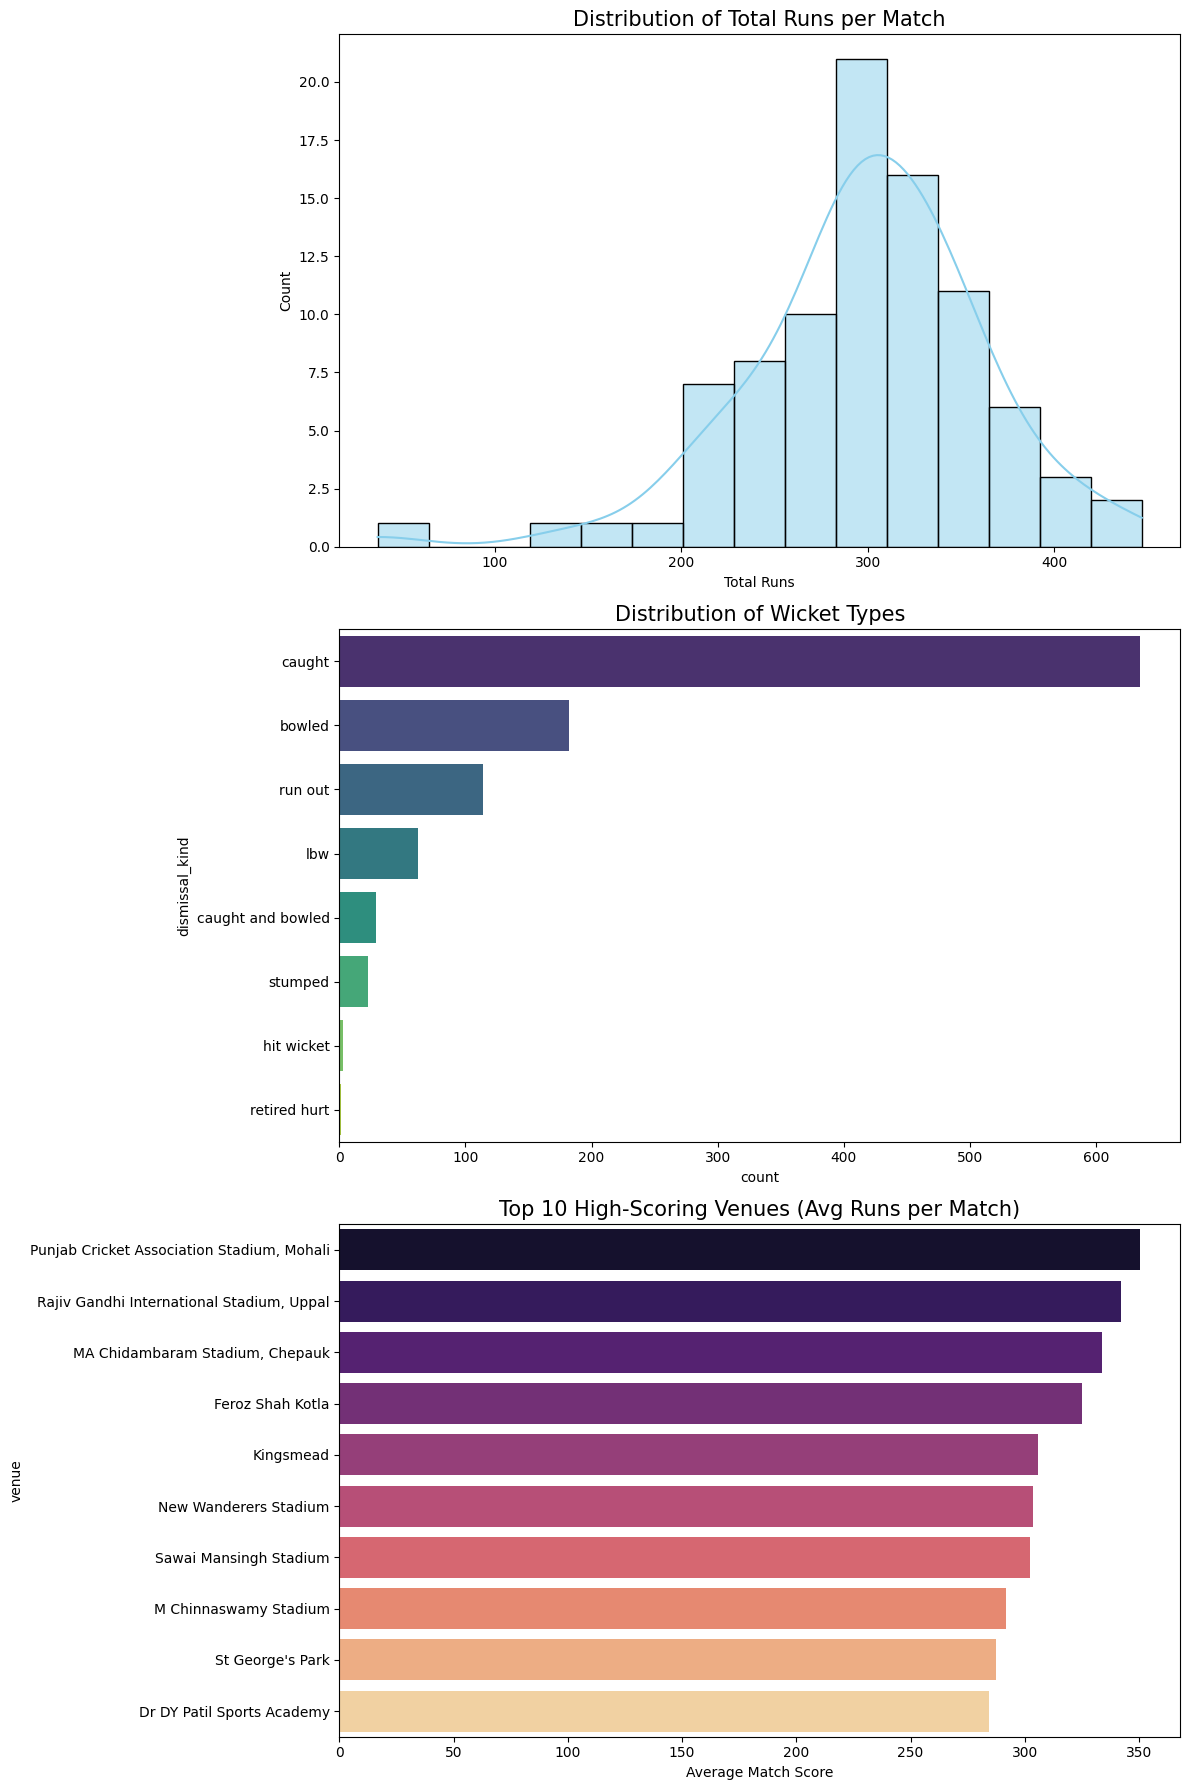

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# 1. Distribution of Total Runs per Match
# We aggregate by match_id first to get the total score per match
match_scores = df_unified.groupby('match_id')['total_runs'].sum()
sns.histplot(match_scores, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Total Runs per Match', fontsize=15)
axes[0].set_xlabel('Total Runs')

# 2. Most Common Wicket Types
# Filter for actual dismissals (excluding 'none')
wickets_df = df_unified[df_unified['dismissal_kind'] != 'none']
sns.countplot(data=wickets_df, y='dismissal_kind', ax=axes[1], palette='viridis', order=wickets_df['dismissal_kind'].value_counts().index)
axes[1].set_title('Distribution of Wicket Types', fontsize=15)

# 3. Venue-specific Performance (Top 10 Venues by Average Runs)
# This shows which stadium is a "batsman's paradise"
venue_avg = df_unified.groupby('venue')['total_runs'].sum() / df_unified.groupby('venue')['match_id'].nunique()
venue_avg = venue_avg.sort_values(ascending=False).head(10)
sns.barplot(x=venue_avg.values, y=venue_avg.index, ax=axes[2], palette='magma')
axes[2].set_title('Top 10 High-Scoring Venues (Avg Runs per Match)', fontsize=15)
axes[2].set_xlabel('Average Match Score')

plt.tight_layout()
plt.show()

# Initial Findings


1. Scoring Trends (Total Runs per Match)

The distribution is slightly "right-skewed," with most matches totaling between 300 and 350 runs (combined for both innings).

There are very few low-scoring matches (below 200 runs), indicating that the pitches in this dataset generally favor high-scoring gameplay.

2. Bowling Analysis (Wicket Types)

"Caught" is overwhelmingly the most common way to get out, occurring roughly 3 times more often than "Bowled."

Rare dismissals like "hit wicket" and "retired hurt" are visible but statistically negligible, suggesting the focus for predictive modeling should be on outfield catches and pace/line for bowled/lbw.

3. Venue Insights (High-Scoring Grounds)

Punjab Cricket Association Stadium (Mohali) and Rajiv Gandhi International Stadium (Uppal) lead as the highest-scoring venues, averaging near 350 runs per match.

Interestingly, Eden Gardens appears at the bottom of the Top 10 list, suggesting it may be a more "bowler-friendly" track compared to the others shown.